In [16]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [17]:
df=pd.read_csv('../7 занятие/Сроки разрезы.csv')
df=df[df['Дата']>'2020-06-16']
group=df.groupby('Дата', as_index=False).agg({'ДнейВРемонте':'sum', 'СрокВТранзите':'mean'})
group.head()

,Дата,ДнейВРемонте,СрокВТранзите
0,2020-06-17,57780.066992,4.290018
1,2020-06-18,63594.644193,4.102380
2,2020-06-19,58955.355723,4.094516
3,2020-06-20,38781.338506,4.175789
4,2020-06-21,31471.055487,3.964454


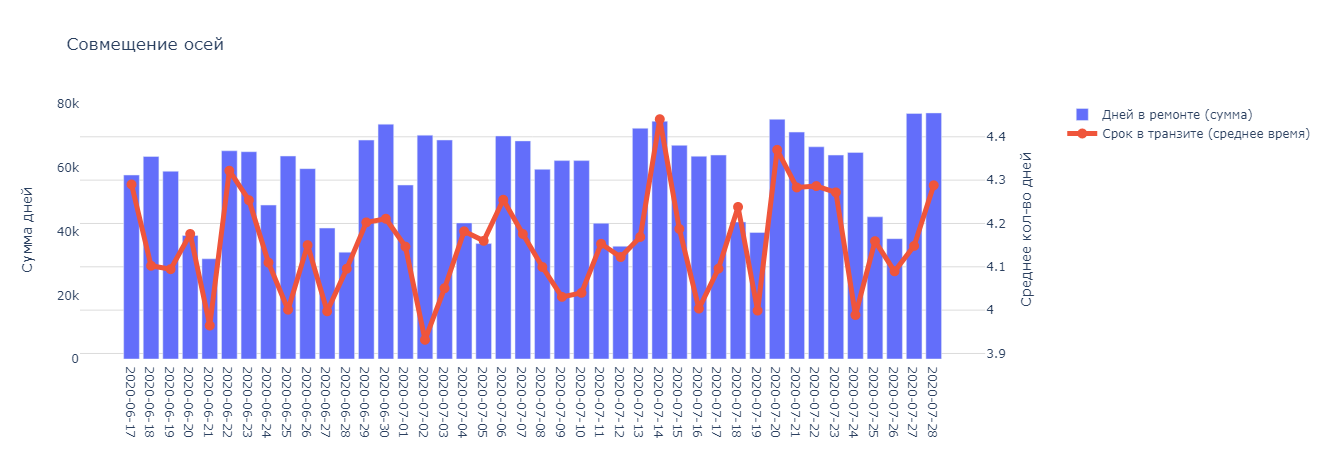

In [18]:
figure = make_subplots(specs=[[{"secondary_y": True}]])

figure.add_trace(
    go.Bar(x=group['Дата'],
           y=group["ДнейВРемонте"],
           name="Дней в ремонте (сумма)",
           hovertemplate='%{y:.3s}<br>%{x}'
           ),
secondary_y=False)
figure.add_trace(
    go.Scatter(x=group['Дата'],
                y=group["СрокВТранзите"],
                name="Срок в транзите (среднее время)",
                mode='lines+markers',
                hovertemplate='%{y:.1f}<br>%{x}',
                line_width=5,
                marker_size=10),
secondary_y=True)

figure.update_layout(plot_bgcolor='white',
                     title = 'Совмещение осей')

figure.update_xaxes(categoryarray=group['Дата'].unique(),
                    type='category')

figure.update_yaxes(title = 'Сумма дней',
                    secondary_y=False)

figure.update_yaxes(showgrid=True,
                    gridcolor='rgb(220, 220, 220)',
                    title = 'Среднее кол-во дней',
                    secondary_y=True)
figure.show()

## Задание
* Выбрать данные из файла "Отправки поставщику.xlsx" за 3 месяца и сгруппировать по дате с суммой по столбцу "СуммаОборот"
* Добавить столбец "Доля", в котором будет посчитана доля оборота от суммарного оборота за весь выбранный период
* Отобразить полученные два столбца на одном графике ('СуммаОборот' по одной оси У, 'Доля' в процентах по другой оси У)